In [1]:
from sklearn.datasets import make_moons

In [6]:
X,y = make_moons(n_samples=1000, noise=.05)

In [7]:
X.shape

(1000, 2)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

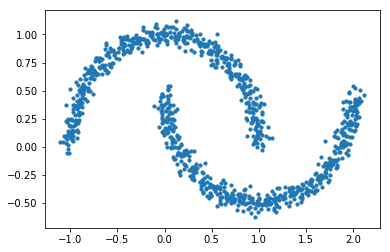

In [10]:
plt.scatter(X[:,0],X[:,1],s=10)

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [12]:
kmeans = KMeans(n_clusters=2)
aggloc = AgglomerativeClustering(linkage='single')

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
aggloc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

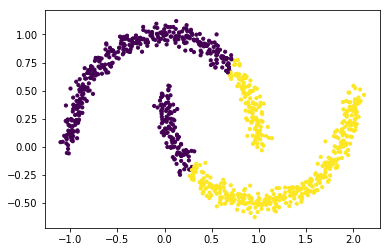

In [16]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=10)

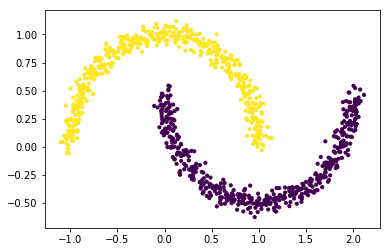

In [17]:
plt.scatter(X[:,0], X[:,1], c=aggloc.labels_, s=10)

In [18]:
from skimage.io import imread,imshow

In [25]:
from skimage.transform import resize

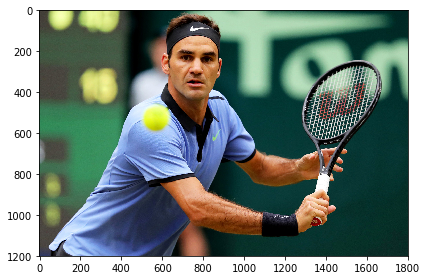

In [19]:
imshow('/home/awantik/Pictures/roger_federer_2.jpg')

In [26]:
img = imread('/home/awantik/Pictures/roger_federer_2.jpg')

In [22]:
img = img/255
img_tf = img.reshape(1200*1800,3)

In [34]:
img_rs = resize(img, (1200/12,1800/12), anti_aliasing=True)

/home/awantik/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [35]:
img_rs.shape

(100, 150, 3)

In [37]:
img_tf = img_rs.reshape(100*150,3)

In [48]:
aggloc = AgglomerativeClustering(linkage='ward')

In [49]:
aggloc.fit(img_tf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [50]:
import pandas as pd
pd.Series(aggloc.labels_).value_counts()

0    11468
1     3532
dtype: int64

In [55]:
cluster0 = img_tf[aggloc.labels_ == 0]

In [57]:
cluster1 = img_tf[aggloc.labels_ == 1]

In [56]:
cluster0.shape

(11468, 3)

In [58]:
cluster1.shape

(3532, 3)

In [64]:
cluster1[:100]

array([[0.73333333, 0.79411765, 0.46470588],
       [0.78235294, 0.83529412, 0.52843137],
       [0.80686275, 0.85098039, 0.56176471],
       [0.80784314, 0.85098039, 0.56176471],
       [0.79019608, 0.83921569, 0.53333333],
       [0.74901961, 0.80588235, 0.4745098 ],
       [0.6627451 , 0.72843137, 0.38529412],
       [0.69019608, 0.76764706, 0.43921569],
       [0.75980392, 0.81764706, 0.49901961],
       [0.77254902, 0.82745098, 0.50784314],
       [0.7754902 , 0.82352941, 0.50784314],
       [0.77843137, 0.8254902 , 0.50588235],
       [0.76666667, 0.81372549, 0.48529412],
       [0.74313725, 0.79117647, 0.45490196],
       [0.75490196, 0.80392157, 0.4745098 ],
       [0.77254902, 0.81960784, 0.5       ],
       [0.74803922, 0.78921569, 0.46176471],
       [0.69215686, 0.74411765, 0.40392157],
       [0.43431373, 0.61470588, 0.49411765],
       [0.46764706, 0.64117647, 0.51764706],
       [0.49803922, 0.66176471, 0.54313725],
       [0.52745098, 0.67941176, 0.5627451 ],
       [0.

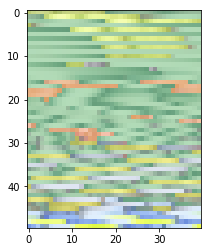

In [72]:
plt.imshow(cluster1[:2000].reshape(50,40,3))

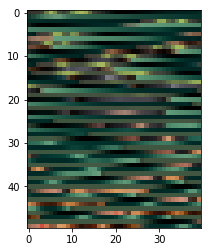

In [71]:
plt.imshow(cluster0[:2000].reshape(50,40,3))

In [73]:
cluster0.shape

(11468, 3)

In [79]:
import numpy as np
np.mean([[1,2,3],[2,3,4]],axis=0)

array([1.5, 2.5, 3.5])

In [81]:
mean0 = np.mean(cluster0,axis=0)

In [82]:
mean1 = np.mean(cluster1,axis=0)

In [84]:
cluster_means = np.array([mean0,mean1])

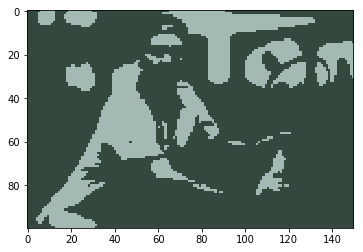

In [86]:
plt.imshow(cluster_means[aggloc.labels_].reshape(100,150,3))